# Implementation Correctness Report - DBScan Clustering

In [1]:
#import statements
import pandas as pd
import numpy as np
import math
import random

from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

In [2]:
#Load dataset from csv file
df = pd.read_csv('../implementation_correctness_dataset.csv')
X = df[['Feature 1', 'Feature 2']].values
y = df['Class/Cluster'].values

In [3]:
df.head()

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.0,1
1,1.045,0.0,1
2,2.080,0.0,1
3,3.125,0.0,1
4,4.180,0.0,1


# DBScan Clustering algorithm - Scratch Implementation

In [4]:
#isInsideCircle() Function : Calculates the euclidean distance between two points.
def isInsideCircle(center_x, center_y, radius, x, y):
    dist = math.sqrt((x - center_x)**2 + (y - center_y)**2)
    if dist <= radius:
        return True
    else:
        return False

l = [9, 13, 14, 16]

#corePoints() Function : Identifies the core and non-core points in the dataset. 
def corePoints(X, eps, min_samples):
    corePointsList = []
    nonCorePointsList = []
    for i in range(0, len(X)):
        count = 0
        for j in range(0, len(X)):
            if(isInsideCircle(X[i][0], X[i][1], eps, X[j][0], X[j][1])):
                count+=1
            if(count>=min_samples):
                temp = list(X[i])
                temp.append(i)
                corePointsList.append(np.array(temp))
                break
        if(count < min_samples):
            np.append(X[i], i)
            nonCorePointsList.append(X[i])
    return corePointsList, nonCorePointsList

non_core_point = l
core_point = l


#dbscanfromscratch() Function : Performs the actual DBScan Clustering Algorithm returning the clusters. 
def dbscanfromscratch(X, eps, min_samples):  
    order = []
    core_points, non_core_points = corePoints(X, eps, min_samples)
    d = {}
    clusterNumber = 0
    while(clusterNumber < 2):
        index = random.randint(0, len(core_points)-1)
        d[clusterNumber] = []
        d[clusterNumber].append(list((core_points[index])))
        temp_order = [core_points[index][2], 'core']
        order.append(temp_order)
        center = core_points.pop(index)
        queue = []
        core_points_dup = core_points.copy()
        offset = 0
        for i in range(0, len(core_points_dup)):
            if(isInsideCircle(center[0], center[1], eps, core_points_dup[i][0], core_points_dup[i][1])):
                d[clusterNumber].append(list(core_points_dup[i]))
                temp_order = [core_points_dup[i][2], 'core']
                order.append(temp_order)
                queue.append(core_points.pop(i-offset))
                offset += 1
        k = 0
        while(queue and k < 569):
            center =  queue.pop(0)
            core_points_dup = core_points.copy()
            offset = 0
            for i in range(0, len(core_points_dup)):
                if(isInsideCircle(center[0], center[1], eps, core_points_dup[i][0], core_points_dup[i][1])):
                    d[clusterNumber].append(list(core_points_dup[i]))
                    temp_order = [core_points_dup[i][2], 'core']
                    order.append(temp_order)
                    queue.append(core_points.pop(i-offset))
                    offset += 1
            k+=1
        non_core_points_dup = non_core_points.copy()
        offset = 0
        for i in d[clusterNumber]:
            center = i
            for j in range(0, len(non_core_points_dup)):  
                if(isInsideCircle(center[0], center[1], eps, non_core_points_dup[j][0], non_core_points_dup[j][1])):
                    d[clusterNumber].append(list(non_core_points_dup[j]))
                    temp_order = [non_core_points_dup[i][2], 'non-core']
                    order.append(temp_order)
                    if(j-offset >= 0 and j-offset < len(non_core_points)):
                        non_core_points.pop(j-offset)
                        offset += 1
        clusterNumber += 1
    dbs_pred = []
    for i in range(0, len(X)):
        dbs_pred.append(1)
    for i in d.get(1):
        dbs_pred[int(i[2])] = 2
    return dbs_pred, order    

In [5]:
#Defining parameters for the DBScan clustering algorithm with the given epsilon and min_samples values.
eps = 1.25
min_samples = 2

#DBScan Function call.
dbs_pred, order = dbscanfromscratch(X, eps, min_samples)

print("Original Value:", y)
print("Predicted Values:", dbs_pred)
print("Silhouette Score:", silhouette_score(X, dbs_pred))
print("NMI Score:", normalized_mutual_info_score(y, dbs_pred))

Original Value: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2]
Predicted Values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]
Silhouette Score: -0.029728807189886384
NMI Score: 1.0


Text(0.5, 1.0, 'My DBScan Clusters Plot')

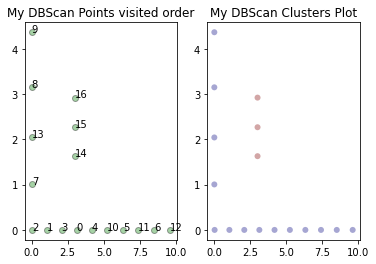

In [6]:
#Labeled scatter plot
f, (ax1,ax2) = plt.subplots(1, 2)

#Scatter plot of the dataset with an integer on top of each point showing the order visited by the algorithm.
ax1.scatter(X[:,0],X[:,1], facecolors='green', edgecolor = "black", alpha=0.35)
for i, txt in enumerate(order):
    ax1.annotate(int(txt[0]), (X[i][0], X[i][1]))
ax1.set_title('My DBScan Points visited order')

#Using different colors for points belonging to different clusters as obtained by DBScan.
ax2.scatter(X[:,0],X[:,1],  c = dbs_pred, cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('My DBScan Clusters Plot')

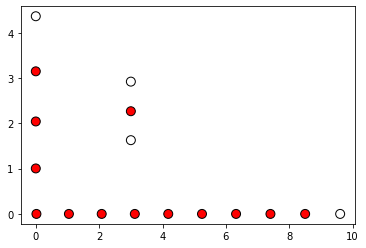

In [7]:
#Denoting the core points with filled circles and non-core points with empty circles.
filled = []
for i in range(0, len(X)):
    if i in non_core_point:
        filled.append(False)
    else:
        filled.append(True)
plt.scatter(X[:,0], X[:,1], s=80, facecolors=['none' if not h else 'red' for h in filled], edgecolor='black')
plt.show()